# <font color='blue'>Introduction to Wavelets</font>

---

<img src="images/cea_logo.png" width="100" align="right">


> Author: **Samuel Farrens**

> Year: **2016**

> Version: **1.0**

> Email: **[samuel.farrens@cea.fr](mailto:samuel.farrens@cea.fr)**

> Web: **[CosmoStat Website](http://www.cosmostat.org/)**


## <font color='blue'>Contents</font>

---
 
1. [Set-Up](#Set-Up)
1. [Introduction](#Introduction)
1. [Windowed Fourier Transform](#Windowed-Fourier-Transform)
 * [Discrete Fourier Transform](#Discrete-Fourier-Transform)
 * [Gabor Transform](#Gabor-Transform)
1. [Wavelets](#Wavelets)

## <font color='blue'>Set-Up</font>

---

Here we will import a couple of packages that we will need throughout the notebook.

In [1]:
# Tell Jupyter to display plots in this notebook.
%matplotlib inline

# Import the numpy package with the alias np.
import numpy as np           

# Import the pyplot package from matplotlib with the alias plt.
import matplotlib.pyplot as plt  
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# Import some tools from scipy.
from scipy import fftpack, signal

# Import time package.
import time

# SOME USEFUL FUNCTIONS

# Function to calculate an orthonormal descrete cosine transform.
def fft(signal):

    return fftpack.fft(signal)

# Function to calculate an orthonormal descrete cosine transform.
def ifft(signal):

    return fftpack.ifft(signal)

def hide_axes(axis):
    
    axis.xaxis.set_ticklabels([])
    axis.yaxis.set_ticklabels([])

## <font color='blue'>Introduction</font>

---



## <font color='blue'>Windowed Fourier Transform</font>

---

Most signals can be decomposed into a sum of sine and cosine waves.

### <font color='green'>Discrete Fourier Transform</font>

The Discrete Fourier Transform (DFT) can be represented as:

$$F[n] = \frac{1}{N} \sum_{k=0}^{N-1} f[k] e^{2\pi i kn/N}$$

where $N$ denotes the number of data points, and $n$ and $k$ represent the ordinals in the time and frequency domains respectively. The corresponding inverse function is:

$$f[k] = \sum_{n=0}^{N-1} F[n] e^{-2\pi i kn/N}$$

We can use this transform to extract frequency information from a given signal.

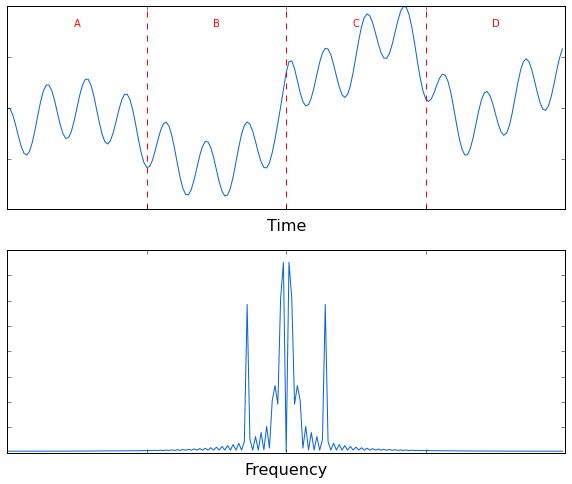

In [2]:
# Define the signal
n = np.linspace(-1, 1, 200, endpoint=False)
Fn  = np.cos(2 * np.pi * 7 * n) + signal.gausspulse(n - 0.4, fc=2) + np.sin(2 * np.pi * n) + np.tanh(2 * np.pi * 8 * n)
Fn /= max(abs(Fn))

# Get the Fourier transform of the signal
fk = np.abs(fftpack.fftshift(fft(Fn)))

# Display
ax1 = plt.subplot(211)
ax1.plot(n, Fn, '-', color='#0764DB')
ax1.plot([-0.5, -0.5], [-1, 1], 'r--')
ax1.plot([0.0, 0.0], [-1, 1], 'r--')
ax1.plot([0.5, 0.5], [-1, 1], 'r--')
plt.text(-0.76, 0.8, 'A', color='red')
plt.text(-0.26, 0.8, 'B', color='red')
plt.text(0.24, 0.8, 'C', color='red')
plt.text(0.74, 0.8, 'D', color='red')
ax1.set_xlabel('Time', fontsize=16)
hide_axes(ax1)
ax2 = plt.subplot(212)
ax2.plot(n, fk, '-', color='#0764DB')
ax2.set_xlabel('Frequency', fontsize=16)
hide_axes(ax2)
plt.show()

In doing so, however, we lose all of the time infotmation. We can try instead looking at the frequency information contained within smaller time intervals.

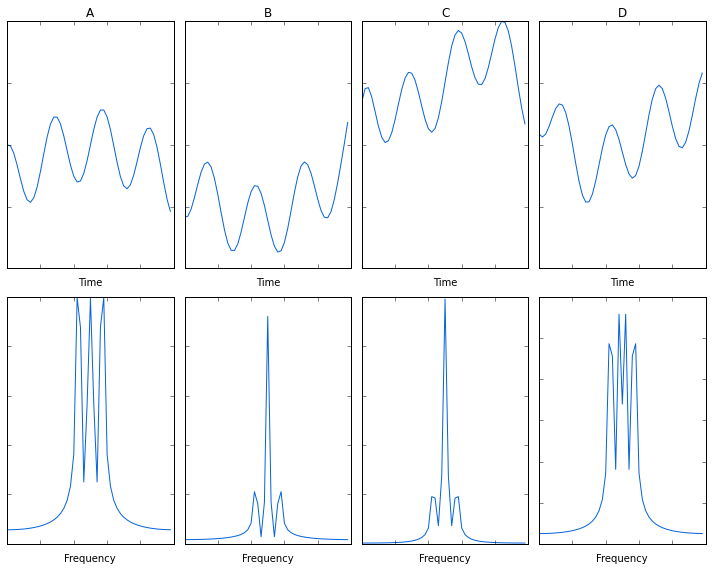

In [3]:
# Slice the signal into four pieces
slice_size = n.size / 4
slices = [slice(i * slice_size, (i + 1) * slice_size) for i in range(4)]
titles = ('A', 'B', 'C', 'D')

# Display
for i in range(len(slices)):
    fk_slice = np.abs(fftpack.fftshift(fft(Fn[slices[i]])))
    ax = plt.subplot(2, 4, i + 1)
    ax.plot(n[slices[i]], Fn[slices[i]], '-', color='#0764DB')
    ax.set_ylim(-1, 1)
    ax.set_xlabel('Time')
    ax.set_title(titles[i])
    hide_axes(ax)
    ax = plt.subplot(2, 4, i + 5)
    ax.plot(n[slices[i]], fk_slice, '-', color='#0764DB')
    ax.set_xlabel('Frequency')
    hide_axes(ax)
plt.tight_layout()
plt.show()

What happens if we make the windows smaller?

### <font color='green'>Uncertainty Principle</font>

The **Heisenberg–Gabor limit**, 

$$\Delta t \Delta \omega \geq \frac{1}{2},$$

an interpretation of the uncertainty principle, shows that it is not possible to simultaneously sharply localize a signal in both the time domain and frequency domain.

In other words we will always need to make a trade-off between time information and frequency information, but is the best way to preserve as much of both as possible?

### <font color='green'>Gabor Transform</font>

The Gabor transform or Short Time Fourier Transform (STFT) can be represented as:

$$f[m, k] = \sum_{n=0}^{N-1} F[n] g[n - m] e^{-2\pi i kn/N}$$

where $g$ is a filter localised at $m$. Effectively this performs a Fourier transform of the signal within the filter which is centred at $m$. 

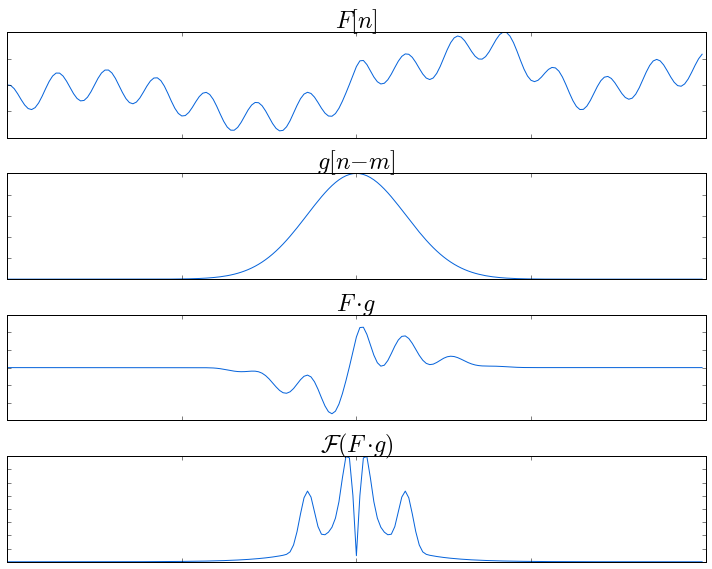

In [4]:
# Define a Gaussian filter.
def get_filter(m, w):

    return np.exp(-w * (n - m) ** 2)

# Set filter width.
width = 25

# Set filter position.
pos = 0.0

# Get localised filter.
g = get_filter(pos, width)

# Filter the signal.
Fg = Fn * g

# Get frequencies of filtered signal.
Fg_fft = np.abs(np.fft.fftshift(fft(Fg)))

# Display.
fig, ax = plt.subplots(4, 1)
ax[0].plot(n, Fn, '-', color='#0764DB')
ax[0].set_title('$F[n]$', fontsize=24)
ax[1].plot(n, g, '-', color='#0764DB')
ax[1].set_title('$g[n-m]$', fontsize=24)
ax[2].plot(n, Fg, '-', color='#0764DB')
ax[2].set_title('$F \cdot g$', fontsize=24)
ax[3].plot(n, Fg_fft, '-', color='#0764DB')
ax[3].set_title('$\mathcal{F}(F \cdot g)$', fontsize=24)
[hide_axes(i) for i in ax]
plt.tight_layout()
plt.show()


Try adjusting the filter width and position ($-1\leq m\leq 1$) and see what happens.

Now, to try to preserve some frequency and time information simultaneously we will slide the filter across the whole signal and store the frequencies at a set of intervals.

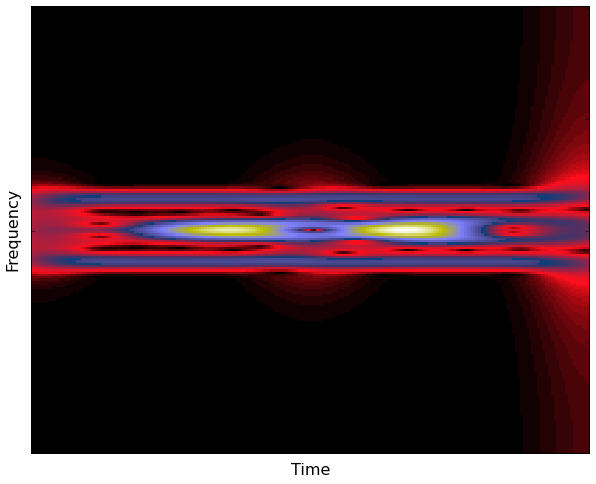

In [5]:
# Set a range of time intervals.
intervals = np.arange(-1, 1, 0.01)

# Get the FFT of the filtered signal at each interval.
w = []
for m in intervals:
    w.append(np.abs(np.fft.fftshift(fft(Fn * get_filter(m, width)))))
w = np.array(w).T

# Display
fig, ax = plt.subplots(1, 1)
ax.imshow(w, aspect='auto', interpolation='nearest', cmap='gist_stern')
ax.set_xlabel('Time', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
hide_axes(ax)
plt.show()

Try chaning the filter width to see what happens.

While we retain information in both time and frequency domains we also lose resolution. When the window is small we have good time localisation but we can only capture high frequencies. On the other hand, when the window is large we can capture lower frequencies but we have very poor time localisation.

## <font color='blue'>Wavelets</font>

---

### <font color='green'>Multiresolution Analysis</font>

One way we can improve upon the Gabor method is using *Multiresolution Analysis (MRA)*. Rather than choosing a fixed window size that will be more localised in either the time or frequency domain, we can instead do the following:

* Start with a small window and extract the highest frequency content of the signal with very good time localisation.
* Then remove these frequencies from the signal.
* Then by enlarging the window by a small amount we can pick out the highest remaining frequencies, which will be lower than those removed, with slighly worse time localisation.
* This process can be continued until the widow contains the entire signal which will only retain the lowest frequencies.

### <font color='green'>General Form</font>

The wavelet function is often represented as follows:

$$\psi_{a,b}(t) = \frac{1}{\sqrt{a}} \psi \Bigg(\frac{t-b}{a} \Bigg)$$

where $a$ defines the wavelet scale and $b$ the shift. $\psi$ is known as the *Mother Wavelet* which must posses certain properties (see *e.g.* [Wikipedia](https://en.wikipedia.org/wiki/Wavelet#Mother_wavelet) for more details). Many different wavelets exist, but we will only discuss a few basic ones.


### <font color='green'>Haar Wavelet</font>

The Haar wavelet (1910) is defined as follows:

$$\psi(t) = \begin{cases}1 & 0 \leq t \leq \frac{1}{2} \\ -1 & \frac{1}{2} \leq t \leq 1 \\ 0 & \text{otherwise}\end{cases}$$

and has the following properties:

$$\int_{-\infty}^\infty\psi(t)dt = 0$$

$$\|\psi(t)\|_2^2 = 1$$

### <font color='green'>Mexican Hat Wavelet</font>

The Mexican Hat (or Ricker) wavelet  is defined as follows:

$$\psi(t) = (1-t^2)e^{-\frac{t^2}{2}}$$

This wavelet has good time


### <font color='green'>Continuous Wavelet Transform</font>

The Continuous Wavelet Transform (CWT) is used to decompose a signal into wavelets and can be defined as follows:

$$F_{\omega}(a, b) = \frac{1}{|a|^{0.5}}\int_{-\infty}^\infty f(t)\bar{\psi}\Bigg(\frac{t-b}{a}\Bigg)dt$$

/Users/sfarrens/Documents/Library/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


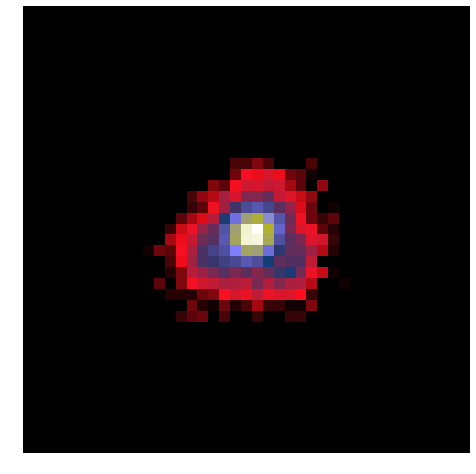

In [6]:
from wavelet import *

image = np.load('images/galaxy_example.npy')

plt.imshow(image, cmap='gist_stern', interpolation='nearest')
plt.axis('off')
plt.show()

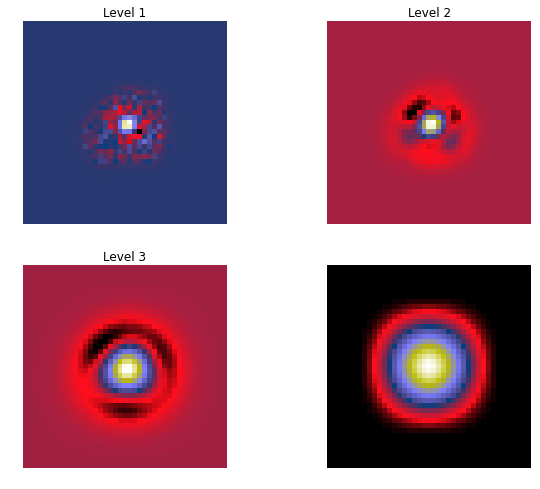

In [33]:
filters, coarse_scale = get_mr_filters(image.shape, coarse=True)

wave_coef = filter_convolve(image, filters)

for i, wave in enumerate(wave_coef):
    plt.subplot(2, 2, i + 1)
    plt.imshow(wave, cmap='gist_stern', interpolation='nearest')
    plt.title('Level ' + str(i + 1))
    plt.axis('off')
plt.subplot(224)
plt.imshow(coarse_scale, cmap='gist_stern', interpolation='nearest')
plt.axis('off')
plt.show()